# Video Game Sales with Ratings

## 設定

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 要素数のカウント
def count_data(data):
    count = data.value_counts().tolist()
    label = data.value_counts().index.tolist()
    return count, label

# プロットする際に要素数も表示
def pct_abs(pct, data, rate):
    absolute = int(round((np.sum(data)*(pct/100.)))) # round()を噛ませないとずれる
    return '{:d}\n({:.1f}%)'.format(absolute, pct) if pct > rate else ''

# 構成比のプロット
def plot_result_ratio(data, label, rate, title):
    plt.style.use('ggplot')
    plt.rcParams.update({'font.size':10})
    plt.figure(figsize=(8,6), dpi=100)
    plt.title(title)
    plt.pie(x=data, startangle=90, counterclock=False, autopct=lambda p:pct_abs(p, data, rate), pctdistance=0.75)
    plt.axis('equal')
    plt.legend(label, fancybox=True, loc='best', bbox_to_anchor=(0.9, 0.9))
    plt.show()

# 販売数の計算
def calc_total_sales(game_df, df, key, region):
    if key == 'Platform':
        result_dict = {x:[] for i, x in enumerate(game_df.Platform)}
        dict_idx = {x:[] for i, x in enumerate(game_df.Platform)}
        dict_sales = {x:[] for i, x in enumerate(game_df.Platform)}
    elif key == 'Genre':
        result_dict = {x:[] for i, x in enumerate(game_df.Genre)}
        dict_idx = {x:[] for i, x in enumerate(game_df.Genre)}
        dict_sales = {x:[] for i, x in enumerate(game_df.Genre)}

    for data in result_dict:
        # TOP10のタイトルのインデクス抽出
        if key == 'Platform':
            dict_idx[data] = [i for i, x in enumerate(df.Platform) if df.Platform[i]==data][:10]
        elif key == 'Genre':
            dict_idx[data] = [i for i, x in enumerate(df.Genre) if df.Genre[i]==data][:10]
        
        # インデクスに対応する販売実績を抽出
        if region == 'NA':
            dict_sales[data] = [round(df.NA_Sales[idx]*100) for idx in dict_idx[data]]
        elif region == 'EU':
            dict_sales[data] = [round(df.EU_Sales[idx]*100) for idx in dict_idx[data]]
        elif region == 'JP':
            dict_sales[data] = [round(df.JP_Sales[idx]*100) for idx in dict_idx[data]]
        
        # ハード毎の販売実績の総和
        result_dict[data] = sum(dict_sales[data])/100
    return  result_dict

## 概要

In [3]:
game_df = pd.read_csv('./data/Video_Games_Sales_as_at_22_Dec_2016.csv')
print('ゲームタイトル数：', len(game_df))

# プラットフォームの集合(2000年以降)
#platform = set(x for i, x in enumerate(game_df[:100].Platform))
platform = set(x for i, x in enumerate(game_df[game_df.Year_of_Release >= 2000].Platform))
platform.remove('PC')
platform.remove('PS')
platform.remove('N64')
platform.remove('GB')
platform.remove('DC')
platform.remove('WS')

game_df = game_df[game_df['Platform'].isin(platform)]
game_df.Platform.value_counts()

ゲームタイトル数： 16719


PS2     2161
DS      2152
PS3     1331
Wii     1320
X360    1262
PSP     1209
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
XOne     247
WiiU     147
Name: Platform, dtype: int64

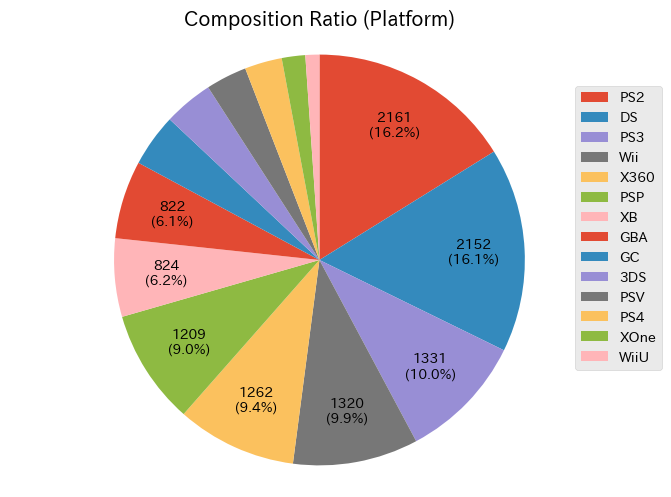

['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'XB', 'GBA', 'GC', '3DS', 'PSV', 'PS4', 'XOne', 'WiiU']
[2161, 2152, 1331, 1320, 1262, 1209, 824, 822, 556, 520, 432, 393, 247, 147]


In [4]:
# プラットフォーム
plat_cnt, plat_label= count_data(game_df.Platform)
plot_result_ratio(plat_cnt, plat_label, 5, 'Composition Ratio (Platform)')
print(plat_label)
print(plat_cnt)

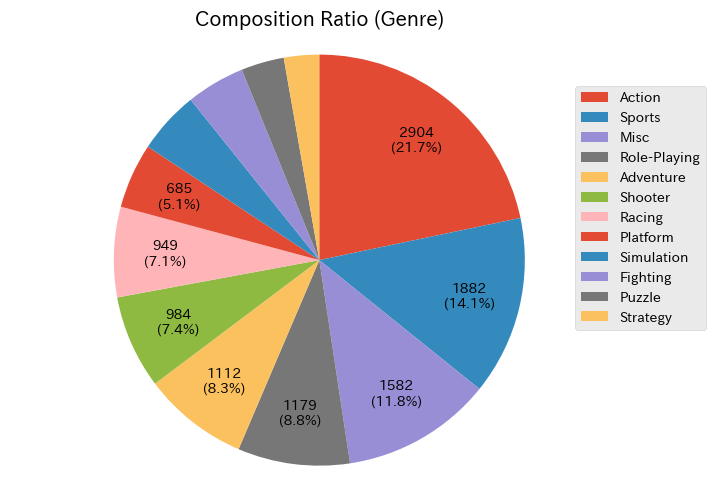

['Action', 'Sports', 'Misc', 'Role-Playing', 'Adventure', 'Shooter', 'Racing', 'Platform', 'Simulation', 'Fighting', 'Puzzle', 'Strategy']


In [5]:
# ジャンル
gen_cnt, gen_label= count_data(game_df.Genre)
plot_result_ratio(gen_cnt, gen_label, 5, 'Composition Ratio (Genre)')
print(gen_label)

---

# 地域別の分析

## NA（North America） について分析

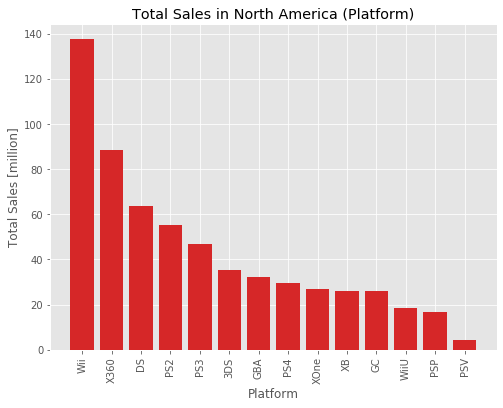

In [5]:
# 計算
na_df = game_df.sort_values('NA_Sales', ascending=False).reset_index(drop=True)
result_na_plat = pd.DataFrame(sorted(calc_total_sales(game_df, na_df, 'Platform', 'NA').items(), key=lambda x:x[1], reverse=True), columns=['Platform', 'Sales'])

# プロット
left = np.arange(len(result_na_plat))

plt.figure(figsize=(8,6))
plt.title('Total Sales in North America (Platform)')
plt.xlabel('Platform')
plt.ylabel('Total Sales [million]')
plt.xticks(left, result_na_plat.Platform.to_list(), rotation=90)

plt.bar(left, result_na_plat.Sales.to_list(), color='tab:red')
plt.show()

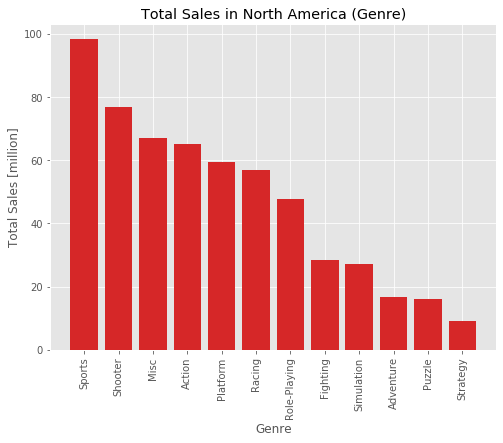

In [6]:
# 計算
na_df = game_df.sort_values('NA_Sales', ascending=False).reset_index(drop=True)
result_na_genre = pd.DataFrame(sorted(calc_total_sales(game_df, na_df, 'Genre', 'NA').items(), key=lambda x:x[1], reverse=True), columns=['Genre', 'Sales'])

# プロット
left = np.arange(len(result_na_genre))
plt.figure(figsize=(8,6))
plt.title('Total Sales in North America (Genre)')
plt.xlabel('Genre')
plt.ylabel('Total Sales [million]')
plt.xticks(left, result_na_genre.Genre.to_list(), rotation=90)

plt.bar(left, result_na_genre.Sales.to_list(), color='tab:red')
plt.show()

## EU（Europe） について分析

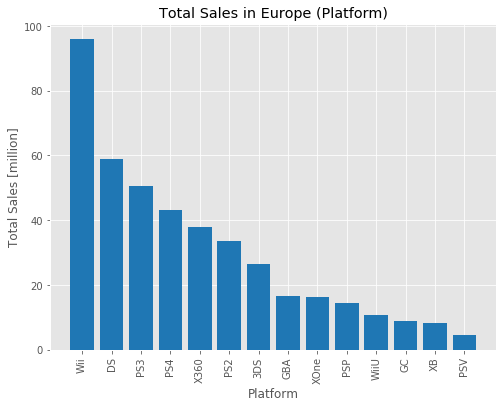

In [7]:
# 計算
eu_df = game_df.sort_values('EU_Sales', ascending=False).reset_index(drop=True)
result_eu_plat = pd.DataFrame(sorted(calc_total_sales(game_df, eu_df, 'Platform', 'EU').items(), key=lambda x:x[1], reverse=True), columns=['Platform', 'Sales'])

# プロット
left = np.arange(len(result_eu_plat))

plt.figure(figsize=(8,6))
plt.title('Total Sales in Europe (Platform)')
plt.xlabel('Platform')
plt.ylabel('Total Sales [million]')
plt.xticks(left, result_eu_plat.Platform.to_list(), rotation=90)

plt.bar(left, result_eu_plat.Sales.to_list(), color='tab:blue')
plt.show()

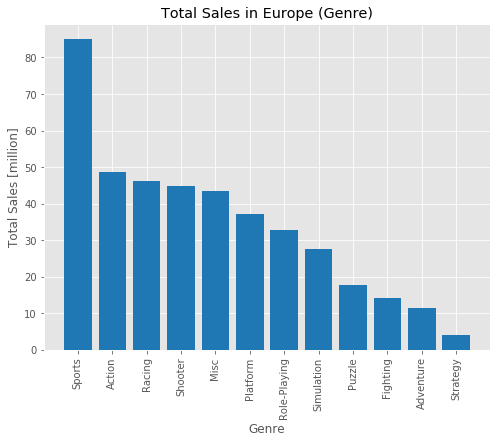

In [8]:
# 計算
eu_df = game_df.sort_values('EU_Sales', ascending=False).reset_index(drop=True)
result_eu_genre = pd.DataFrame(sorted(calc_total_sales(game_df, eu_df, 'Genre', 'EU').items(), key=lambda x:x[1], reverse=True), columns=['Genre', 'Sales'])

# プロット
left = np.arange(len(result_eu_genre))
plt.figure(figsize=(8,6))
plt.title('Total Sales in Europe (Genre)')
plt.xlabel('Genre')
plt.ylabel('Total Sales [million]')
plt.xticks(left, result_eu_genre.Genre.to_list(), rotation=90)

plt.bar(left, result_eu_genre.Sales.to_list(), color='tab:blue')
plt.show()

## JP（Japan） について分析

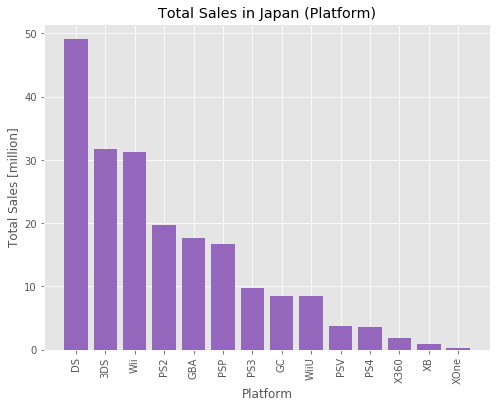

In [9]:
# 計算
jp_df = game_df.sort_values('JP_Sales', ascending=False).reset_index(drop=True)
result_jp_plat = pd.DataFrame(sorted(calc_total_sales(game_df, jp_df, 'Platform', 'JP').items(), key=lambda x:x[1], reverse=True), columns=['Platform', 'Sales'])

# プロット
left = np.arange(len(result_jp_plat))

plt.figure(figsize=(8,6))
plt.title('Total Sales in Japan (Platform)')
plt.xlabel('Platform')
plt.ylabel('Total Sales [million]')
plt.xticks(left, result_jp_plat.Platform.to_list(), rotation=90)

plt.bar(left, result_jp_plat.Sales.to_list(), color='tab:purple')
plt.show()

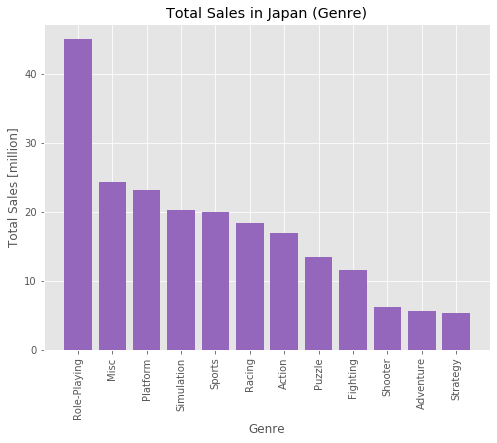

In [10]:
# 計算
jp_df = game_df.sort_values('JP_Sales', ascending=False).reset_index(drop=True)
result_jp_genre = pd.DataFrame(sorted(calc_total_sales(game_df, jp_df, 'Genre', 'JP').items(), key=lambda x:x[1], reverse=True), columns=['Genre', 'Sales'])

# プロット
left = np.arange(len(result_jp_genre))
plt.figure(figsize=(8,6))
plt.title('Total Sales in Japan (Genre)')
plt.xlabel('Genre')
plt.ylabel('Total Sales [million]')
plt.xticks(left, result_jp_genre.Genre.to_list(), rotation=90)

plt.bar(left, result_jp_genre.Sales.to_list(), color='tab:purple')
plt.show()

# 結果の統合

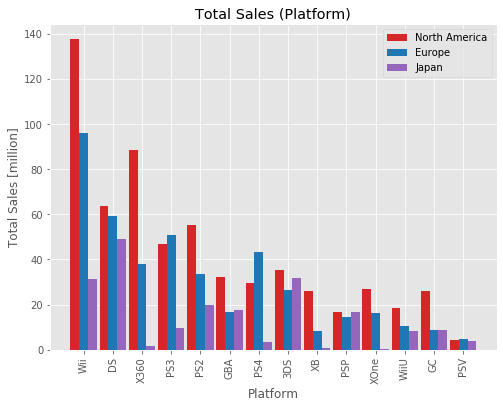

In [11]:
# 3つ並べて表示（プラットフォーム）
result_na_plat_no_sort = pd.DataFrame(calc_total_sales(game_df, na_df, 'Platform', 'NA').items(), columns=['Platform', 'Sales'])
result_eu_plat_no_sort = pd.DataFrame(calc_total_sales(game_df, eu_df, 'Platform', 'EU').items(), columns=['Platform', 'Sales'])
result_jp_plat_no_sort = pd.DataFrame(calc_total_sales(game_df, jp_df, 'Platform', 'JP').items(), columns=['Platform', 'Sales'])

left = np.arange(len(result_na_plat_no_sort))

width=0.3
labels = result_na_plat_no_sort.Platform.to_list()

plt.figure(figsize=(8,6))
plt.title('Total Sales (Platform)')
plt.xlabel('Platform')
plt.ylabel('Total Sales [million]')
plt.xticks(left + width, labels, rotation=90)

plt.bar(left, result_na_plat_no_sort.Sales.to_list(), width=0.3, color='tab:red')
plt.bar(left+width, result_eu_plat_no_sort.Sales.to_list(), width=0.3, color='tab:blue')
plt.bar(left+width*2, result_jp_plat_no_sort.Sales.to_list(), width=0.3, color='tab:purple')

plt.legend(['North America', 'Europe', 'Japan'])

plt.show()

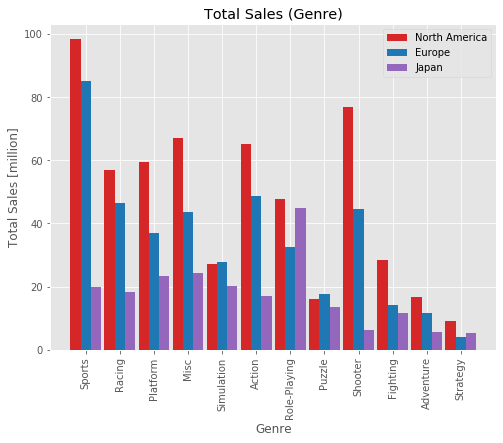

In [12]:
# 3つ並べて表示（ジャンル）
result_na_genre_no_sort = pd.DataFrame(calc_total_sales(game_df, na_df, 'Genre', 'NA').items(), columns=['Genre', 'Sales'])
result_eu_genre_no_sort = pd.DataFrame(calc_total_sales(game_df, eu_df, 'Genre', 'EU').items(), columns=['Genre', 'Sales'])
result_jp_genre_no_sort = pd.DataFrame(calc_total_sales(game_df, jp_df, 'Genre', 'JP').items(), columns=['Genre', 'Sales'])

left = np.arange(len(result_na_genre_no_sort))

width=0.3
labels = result_na_genre_no_sort.Genre.to_list()

plt.figure(figsize=(8,6))
plt.title('Total Sales (Genre)')
plt.xlabel('Genre')
plt.ylabel('Total Sales [million]')
plt.xticks(left + width, labels, rotation=90)

plt.bar(left, result_na_genre_no_sort.Sales.to_list(), width=0.3, color='tab:red')
plt.bar(left+width, result_eu_genre_no_sort.Sales.to_list(), width=0.3, color='tab:blue')
plt.bar(left+width*2, result_jp_genre_no_sort.Sales.to_list(), width=0.3, color='tab:purple')

plt.legend(['North America', 'Europe', 'Japan'])

plt.show()